# Context Sampling In CARL

Let's take a look at how we can sample contexts and use them in the environments. We'll use CARLBraxAnt for a little demonstration.

In [10]:
import matplotlib.pyplot as plt
from carl.context.context_space import NormalFloatContextFeature
from carl.context.sampler import ContextSampler
from carl.envs import CARLBraxAnt

Each environment has an associated context space. Before even instantiating the environment, it let's you take a look at which features can be used and what their default values and bounds are.

In [11]:
print(f"Context feature names for Ant: {CARLBraxAnt.get_context_space().context_feature_names}")
print(f"Default context for Ant: {CARLBraxAnt.get_context_space().get_default_context()}")
print(f"Context value bounds for friction in Ant: {CARLBraxAnt.get_context_space().get_lower_and_upper_bound('friction')}")

Context feature names for Ant: ['gravity', 'friction', 'elasticity', 'ang_damping', 'mass_torso', 'viscosity']
Default context for Ant: {'gravity': -9.8, 'friction': 1.0, 'elasticity': 0.0, 'ang_damping': -0.05, 'mass_torso': 10.0, 'viscosity': 0.0}
Context value bounds for friction in Ant: (0.0, 100.0)


/Users/theeimer/Documents/git/CARL/carl/envs/brax/carl_ant.py:25: RuntimeWarning: invalid value encountered in scalar divide
  "ang_damping": UniformFloatContextFeature(


We can use the built-in context sampler to get context values for training. Here we decide we want a normal distribution of float values for the 'gravity' context feature. The context space makes sure we stay within the bounds for the environment. Let's start with 5 contexts for now.

In [12]:
seed = 0
context_distributions = [NormalFloatContextFeature("gravity", mu=9.8, sigma=1)]
context_sampler = ContextSampler(
        context_distributions=context_distributions,
        context_space=CARLBraxAnt.get_context_space(),
        seed=seed,
    )
contexts = context_sampler.sample_contexts(n_contexts=5)
print(contexts)

{0: {'gravity': 11.564052345967665}, 1: {'gravity': 10.200157208367225}, 2: {'gravity': 10.77873798410574}, 3: {'gravity': 12.04089319920146}, 4: {'gravity': 11.667557990149968}}


/Users/theeimer/Documents/git/CARL/carl/context/sampler.py:44: DeprecationWarning: Prefer using `list(space.values())` over `get_hyperparameters`
  return self.get_hyperparameters()
/Users/theeimer/Documents/git/CARL/carl/context/sampler.py:58: DeprecationWarning: `Configuration` act's like a dictionary. Please use `dict(config)` instead of `get_dictionary` if you explicitly need a `dict`
  contexts = [C.get_dictionary() for C in contexts]


To use the contexts during training, we simply pass them to the environment:

In [13]:
env = CARLBraxAnt(contexts=contexts)
print(f"Full context set: {env.contexts}")
env.reset()
print(f"Current context ID: {env.context_id}")
print(f"Current context: {env.context}")

Full context set: {0: {'gravity': 11.564052345967665, 'friction': 1.0, 'elasticity': 0.0, 'ang_damping': -0.05, 'mass_torso': 10.0, 'viscosity': 0.0}, 1: {'gravity': 10.200157208367225, 'friction': 1.0, 'elasticity': 0.0, 'ang_damping': -0.05, 'mass_torso': 10.0, 'viscosity': 0.0}, 2: {'gravity': 10.77873798410574, 'friction': 1.0, 'elasticity': 0.0, 'ang_damping': -0.05, 'mass_torso': 10.0, 'viscosity': 0.0}, 3: {'gravity': 12.04089319920146, 'friction': 1.0, 'elasticity': 0.0, 'ang_damping': -0.05, 'mass_torso': 10.0, 'viscosity': 0.0}, 4: {'gravity': 11.667557990149968, 'friction': 1.0, 'elasticity': 0.0, 'ang_damping': -0.05, 'mass_torso': 10.0, 'viscosity': 0.0}}
Current context ID: 0
Current context: {'gravity': 11.564052345967665}


If we don't specify a context selector, a reset will automatically switch the context to the next one in our context set.

In [14]:
env.reset()
print(f"Current context ID: {env.context_id}")
print(f"Current context: {env.context}")

Current context ID: 1
Current context: {'gravity': 10.200157208367225}


We can also manually set the context by using its ID:

In [15]:
env.context_id = 4
print(f"Current context ID: {env.context_id}")
print(f"Current context: {env.context}")

Current context ID: 4
Current context: {'gravity': 11.667557990149968}


Apart from the context, CARLBraxAnt functions like any other gymnasium environment - so your training loops don't have to change at all.

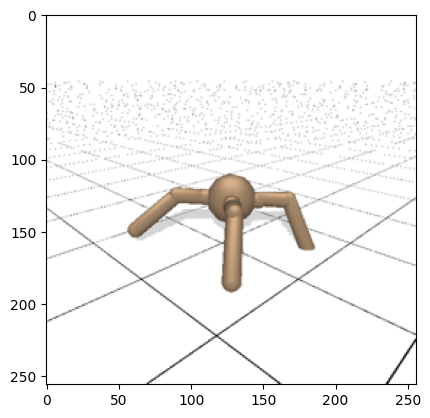

In [16]:
action = env.action_space.sample()
state, reward, terminated, truncated, info = env.step(action)
done = terminated or truncated
plt.imshow(env.render())